In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, ReLU, Flatten, Dropout, Dense, Reshape, Conv2DTranspose, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.layers import Input, Embedding, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Mean
import tensorflow as tf
# from tensorflow import InteractiveSession
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import os
from PIL import Image
import glob
from os import listdir
from os.path import isfile, join

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
df = pd.read_csv('aug_df.csv',)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df

,FLOWFACTOR,SPACING,DEP TIME,TOOL,SITE_0,SITE_1,SITE_2,SITE_3,SITE_4,SITE_5,...,SITE_39,SITE_40,SITE_41,SITE_42,SITE_43,SITE_44,SITE_45,SITE_46,SITE_47,SITE_48
0,0.916000,0.344000,69.289000,1,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,...,1593.296029,1592.948758,1592.601486,1592.254216,1591.906946,1591.559675,1591.212405,1590.865134,1590.517862,1590.170593
1,0.916000,0.344000,69.289000,2,1516.411140,1495.080373,1516.482818,1516.366352,1516.918855,1514.835611,...,1481.353478,1481.157584,1480.961690,1480.765797,1480.906328,1481.052943,1480.847698,1480.888354,1481.306459,1481.724561
2,0.916000,0.344000,69.289000,3,1478.098433,1457.372553,1483.945610,1481.342541,1475.516841,1472.935249,...,1491.287428,1490.630367,1489.973305,1489.130805,1487.315196,1485.659583,1484.266940,1482.874286,1481.481632,1480.088988
3,0.916000,0.344000,69.289000,4,1550.290615,1529.621080,1548.352252,1549.929704,1549.697136,1549.235110,...,1508.932376,1508.732902,1508.347436,1508.052235,1508.214925,1508.596579,1509.101775,1509.606975,1510.373006,1511.108004
4,0.957000,0.348000,70.253000,1,1544.883218,1495.156181,1549.023309,1547.829132,1544.253208,1543.623198,...,1569.233533,1569.257056,1569.280579,1569.252501,1568.966865,1568.681228,1568.395593,1567.875699,1567.033903,1565.635512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,0.929218,0.357977,67.644746,4,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,...,1593.296029,1592.948758,1592.601486,1592.254216,1591.906946,1591.559675,1591.212405,1590.865134,1590.517862,1590.170593
15496,0.956936,0.356397,67.098395,4,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,...,1593.296029,1592.948758,1592.601486,1592.254216,1591.906946,1591.559675,1591.212405,1590.865134,1590.517862,1590.170593
15497,0.950564,0.356915,68.528449,4,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,...,1593.296029,1592.948758,1592.601486,1592.254216,1591.906946,1591.559675,1591.212405,1590.865134,1590.517862,1590.170593
15498,0.938446,0.362126,69.100046,4,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,...,1593.296029,1592.948758,1592.601486,1592.254216,1591.906946,1591.559675,1591.212405,1590.865134,1590.517862,1590.170593


In [12]:
all_sites = ['SITE_0', 'SITE_1',
       'SITE_2', 'SITE_3', 'SITE_4', 'SITE_5', 'SITE_6', 'SITE_7', 'SITE_8',
       'SITE_9', 'SITE_10', 'SITE_11', 'SITE_12', 'SITE_13', 'SITE_14',
       'SITE_15', 'SITE_16', 'SITE_17', 'SITE_18', 'SITE_19', 'SITE_20',
       'SITE_21', 'SITE_22', 'SITE_23', 'SITE_24', 'SITE_25', 'SITE_26',
       'SITE_27', 'SITE_28', 'SITE_29', 'SITE_30', 'SITE_31', 'SITE_32',
       'SITE_33', 'SITE_34', 'SITE_35', 'SITE_36', 'SITE_37', 'SITE_38',
       'SITE_39', 'SITE_40', 'SITE_41', 'SITE_42', 'SITE_43', 'SITE_44',
       'SITE_45', 'SITE_46', 'SITE_47', 'SITE_48']

Transforming feature columns to labels for GAN:

In [13]:
Y_COLUMNS = ['FLOWFACTOR', 'SPACING', 'DEP TIME']
scaler_y = MinMaxScaler()

y = df[Y_COLUMNS]
y_scaled = scaler_y.fit_transform(y)

tsne=TSNE()
y_tsne = tsne.fit_transform(y_scaled)

FLOWFACTOR


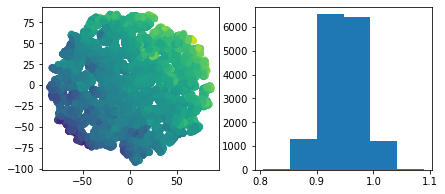

SPACING


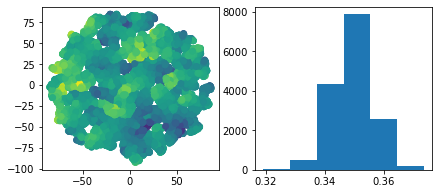

DEP TIME


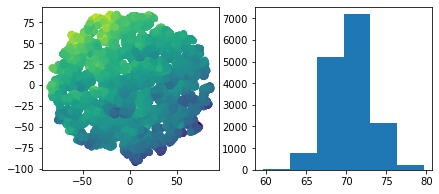

In [14]:
#number of bins per each extrinsic properties
BINS=6

for Y_column in Y_COLUMNS:
    print(Y_column)
    fig, axs= plt.subplots(1,2, figsize=(7,3))
    im=axs[0].scatter(y_tsne[:,0], y_tsne[:,1], c= df[Y_column]);
    h=axs[1].hist(df[Y_column], bins=BINS)
    plt.show()

binning_labels_dict={}
binning_labels_dict['TOOL_binning'] = df['TOOL'].values

Y_COLUMNS_BINNING=['TOOL_binning']
for Y_column in Y_COLUMNS:
    cnt, bins = np.histogram(df[Y_column], bins=BINS)
    bins[0] -= 1
    col_name = Y_column + "_binning"
    binning_labels_dict[col_name] = np.searchsorted(bins, df[Y_column].values)
    Y_COLUMNS_BINNING.append(col_name)
    

In [15]:
binning_df = pd.DataFrame(binning_labels_dict)#.groupby(col_name).count()
binning_df["T"] = 1
count_bins_df = binning_df.groupby(Y_COLUMNS_BINNING).count()
max_count = count_bins_df["T"].max()

df = pd.concat((df,binning_df),axis=1)
df = df.drop("T",axis=1)
count_bins_df = count_bins_df.reset_index()
df = pd.merge(df,count_bins_df,on=Y_COLUMNS_BINNING)
df["weight"] = max_count/df["T"]

In [16]:
df = pd.get_dummies(df, columns=['TOOL'] )

In [17]:
df

,FLOWFACTOR,SPACING,DEP TIME,SITE_0,SITE_1,SITE_2,SITE_3,SITE_4,SITE_5,SITE_6,...,TOOL_binning,FLOWFACTOR_binning,SPACING_binning,DEP TIME_binning,T,weight,TOOL_1,TOOL_2,TOOL_3,TOOL_4
0,0.916000,0.344000,69.289000,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,1,3,3,3,166,2.391566,1,0,0,0
1,0.939000,0.346000,69.284000,1574.299179,1520.989500,1575.684081,1575.633066,1569.829533,1565.840695,1570.900649,...,1,3,3,3,166,2.391566,1,0,0,0
2,0.925000,0.345000,66.973000,1508.957231,1478.320991,1516.519661,1512.938121,1506.859620,1510.003067,1514.031526,...,1,3,3,3,166,2.391566,1,0,0,0
3,0.929000,0.345000,69.167000,1585.288241,1536.724717,1586.654288,1586.529872,1581.782765,1578.558599,1578.238440,...,1,3,3,3,166,2.391566,1,0,0,0
4,0.904000,0.344000,68.017000,1548.330228,1518.638020,1547.523792,1548.328801,1548.086287,1549.836816,1546.409930,...,1,3,3,3,166,2.391566,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,1.001981,0.350454,62.858809,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,3,5,4,1,1,397.000000,0,0,1,0
15496,0.971899,0.365984,72.868920,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,3,4,6,4,1,397.000000,0,0,1,0
15497,0.995622,0.367530,68.395206,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,3,5,6,3,1,397.000000,0,0,1,0
15498,1.042485,0.357351,69.095642,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,4,6,5,3,1,397.000000,0,0,0,1


In [18]:
Y_COLUMNS = ['FLOWFACTOR', 'SPACING', 'DEP TIME', 'TOOL_1', 'TOOL_2', 'TOOL_3', 'TOOL_4']

In [19]:
df

,FLOWFACTOR,SPACING,DEP TIME,SITE_0,SITE_1,SITE_2,SITE_3,SITE_4,SITE_5,SITE_6,...,TOOL_binning,FLOWFACTOR_binning,SPACING_binning,DEP TIME_binning,T,weight,TOOL_1,TOOL_2,TOOL_3,TOOL_4
0,0.916000,0.344000,69.289000,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,1,3,3,3,166,2.391566,1,0,0,0
1,0.939000,0.346000,69.284000,1574.299179,1520.989500,1575.684081,1575.633066,1569.829533,1565.840695,1570.900649,...,1,3,3,3,166,2.391566,1,0,0,0
2,0.925000,0.345000,66.973000,1508.957231,1478.320991,1516.519661,1512.938121,1506.859620,1510.003067,1514.031526,...,1,3,3,3,166,2.391566,1,0,0,0
3,0.929000,0.345000,69.167000,1585.288241,1536.724717,1586.654288,1586.529872,1581.782765,1578.558599,1578.238440,...,1,3,3,3,166,2.391566,1,0,0,0
4,0.904000,0.344000,68.017000,1548.330228,1518.638020,1547.523792,1548.328801,1548.086287,1549.836816,1546.409930,...,1,3,3,3,166,2.391566,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,1.001981,0.350454,62.858809,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,3,5,4,1,1,397.000000,0,0,1,0
15496,0.971899,0.365984,72.868920,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,3,4,6,4,1,397.000000,0,0,1,0
15497,0.995622,0.367530,68.395206,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,3,5,6,3,1,397.000000,0,0,1,0
15498,1.042485,0.357351,69.095642,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,1592.004563,...,4,6,5,3,1,397.000000,0,0,0,1


In [20]:
XS_scaled = XS_scaled.reshape(500, 7, 7)

NameError: name 'XS_scaled' is not defined

In [25]:
BATCH_SIZE=16
batch_count = int(np.ceil(len(df)/BATCH_SIZE))

YS = []
WEIGHTS=[]
scaler_x = MinMaxScaler((-1,1))
XS_scaled = scaler_x.fit_transform(df[all_sites])
XS_scaled = XS_scaled.reshape(15500, 7, 7)

for b in range(0, batch_count):
    print(b * BATCH_SIZE,"->",min(len(df), b * BATCH_SIZE+BATCH_SIZE) - 1)
    batch_indices = np.arange(b * BATCH_SIZE, min(len(df), b * BATCH_SIZE + BATCH_SIZE))
    for ind in batch_indices:              
        YS.append(df.loc[ind,Y_COLUMNS].values)
        WEIGHTS.append(df.loc[ind,"weight"])
        
YS = np.array(YS)
WEIGHTS = np.array(WEIGHTS)

scaler_y_2 = MinMaxScaler()
YS_scaled = scaler_y_2.fit_transform(YS)
dataset=(XS_scaled, YS_scaled, WEIGHTS)

0 -> 15
16 -> 31
32 -> 47
48 -> 63
64 -> 79
80 -> 95
96 -> 111
112 -> 127
128 -> 143
144 -> 159
160 -> 175
176 -> 191
192 -> 207
208 -> 223
224 -> 239
240 -> 255
256 -> 271
272 -> 287
288 -> 303
304 -> 319
320 -> 335
336 -> 351
352 -> 367
368 -> 383
384 -> 399
400 -> 415
416 -> 431
432 -> 447
448 -> 463
464 -> 479
480 -> 495
496 -> 511
512 -> 527
528 -> 543
544 -> 559
560 -> 575
576 -> 591
592 -> 607
608 -> 623
624 -> 639
640 -> 655
656 -> 671
672 -> 687
688 -> 703
704 -> 719
720 -> 735
736 -> 751
752 -> 767
768 -> 783
784 -> 799
800 -> 815
816 -> 831
832 -> 847
848 -> 863
864 -> 879
880 -> 895
896 -> 911
912 -> 927
928 -> 943
944 -> 959
960 -> 975
976 -> 991
992 -> 1007
1008 -> 1023
1024 -> 1039
1040 -> 1055
1056 -> 1071
1072 -> 1087
1088 -> 1103
1104 -> 1119
1120 -> 1135
1136 -> 1151
1152 -> 1167
1168 -> 1183
1184 -> 1199
1200 -> 1215
1216 -> 1231
1232 -> 1247
1248 -> 1263
1264 -> 1279
1280 -> 1295
1296 -> 1311
1312 -> 1327
1328 -> 1343
1344 -> 1359
1360 -> 1375
1376 -> 1391
1392 -> 

10256 -> 10271
10272 -> 10287
10288 -> 10303
10304 -> 10319
10320 -> 10335
10336 -> 10351
10352 -> 10367
10368 -> 10383
10384 -> 10399
10400 -> 10415
10416 -> 10431
10432 -> 10447
10448 -> 10463
10464 -> 10479
10480 -> 10495
10496 -> 10511
10512 -> 10527
10528 -> 10543
10544 -> 10559
10560 -> 10575
10576 -> 10591
10592 -> 10607
10608 -> 10623
10624 -> 10639
10640 -> 10655
10656 -> 10671
10672 -> 10687
10688 -> 10703
10704 -> 10719
10720 -> 10735
10736 -> 10751
10752 -> 10767
10768 -> 10783
10784 -> 10799
10800 -> 10815
10816 -> 10831
10832 -> 10847
10848 -> 10863
10864 -> 10879
10880 -> 10895
10896 -> 10911
10912 -> 10927
10928 -> 10943
10944 -> 10959
10960 -> 10975
10976 -> 10991
10992 -> 11007
11008 -> 11023
11024 -> 11039
11040 -> 11055
11056 -> 11071
11072 -> 11087
11088 -> 11103
11104 -> 11119
11120 -> 11135
11136 -> 11151
11152 -> 11167
11168 -> 11183
11184 -> 11199
11200 -> 11215
11216 -> 11231
11232 -> 11247
11248 -> 11263
11264 -> 11279
11280 -> 11295
11296 -> 11311
11312 -> 1

In [26]:
INPUT_SHAPE=(7, 7, 1)
EXTRINSIC_DIM = 7 #LABELS, Y
latent_dim = 32 # need to confirm
LATENT_DIM = latent_dim

## Discriminator Model

In [27]:
# define the standalone discriminator model
# @tf.function
def define_cond_discriminator(in_shape=INPUT_SHAPE, n_classes=EXTRINSIC_DIM):    
    # label input
    in_label = Input(shape=(EXTRINSIC_DIM,), name="Y_extrinsic")
    # scale up to image dimensions with linear activation
    n_nodes = in_shape[0] * in_shape[1]

    li = Dense(n_nodes)(in_label)

    # reshape to additional channel
    li = Reshape((in_shape[0], in_shape[1], 1))(li)

    # image input
    in_image = Input(shape=in_shape, name="X")
    # concat label as a channel
    merge = Concatenate()([in_image, li])
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
#     fe = BatchNormalization()(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
#     fe = Dropout(0.3)(fe)
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
#     fe = BatchNormalization()(fe)
    # flatten feature maps
    fe = Flatten()(fe)
    # dropout
    fe = Dropout(0.4)(fe)
    # output
    out_layer = Dense(1, activation='sigmoid',name="Discriminator")(fe)
    # define model
    model = Model([in_image, in_label], out_layer)
    # compile model
    opt = Adam(lr=0.00001, beta_1=0.5)
    #opt = Adadelta()

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [28]:
discriminator_model = define_cond_discriminator()

In [29]:
discriminator_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Y_extrinsic (InputLayer)        [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 49)           392         Y_extrinsic[0][0]                
__________________________________________________________________________________________________
X (InputLayer)                  [(None, 7, 7, 1)]    0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 7, 7, 1)      0           dense[0][0]                      
_______________________________________________________________________________________

## Generator Model

In [30]:

# define the standalone generator model
def define_cond_generator(latent_dim=LATENT_DIM, n_classes=EXTRINSIC_DIM):
    init_size=(7, 7)

    # label input
    in_label = Input(shape=(EXTRINSIC_DIM,), name="Y_extrinsic")
    # linear multiplication
    n_nodes = init_size[0] * init_size[1]
    li = Dense(n_nodes)(in_label)
#     li = BatchNormalization()(li)
#     li = Dropout(0.3)(li)

    # reshape to additional channel
    li = Reshape((init_size[0] , init_size[1], 1))(li)

    # image generator input
    in_lat = Input(shape=(latent_dim,), name="Z_latent")
    # foundation for 7x7 image
    n_nodes = 128 * n_nodes
    gen = Dense(n_nodes)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
#     gen = BatchNormalization()(gen)
#     gen = Dropout(0.5)(gen)
    
    gen = Reshape((init_size[0], init_size[1], 128))(gen)

    # merge image gen and label input
    merge = Concatenate()([gen, li])
   
#     gen = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(merge)
#     gen = LeakyReLU(alpha=0.2)(gen)
#     gen = BatchNormalization()(gen)
#     gen = Dropout(0.2)(gen)

#     gen = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(gen)
#     gen = LeakyReLU(alpha=0.2)(gen)
#     gen = BatchNormalization()(gen)
#     gen = Dropout(0.2)(gen)
    
#     gen = Conv2D(128, (3,3), strides=(2,2), padding='same')(gen)
#     gen = BatchNormalization()(gen)
#     gen = LeakyReLU(alpha=0.2)(gen)
# #     fe = Dropout(0.3)(fe)
#     # downsample
#     gen = Conv2D(128, (3,3), strides=(2,2), padding='same')(gen)
#     gen = LeakyReLU(alpha=0.2)(gen)
#     gen = BatchNormalization()(gen)
    
#     gen = Reshape((5, 10, 1))(gen)

    # output
    out_layer = Conv2D(1, (2, 2),activation='tanh', padding='same', name="X_generated")(merge)

    # define model
    model = Model([in_lat, in_label], out_layer)
    return model

In [31]:
generator_model = define_cond_generator()

    

In [32]:
generator_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Z_latent (InputLayer)           [(None, 32)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 6272)         206976      Z_latent[0][0]                   
__________________________________________________________________________________________________
Y_extrinsic (InputLayer)        [(None, 7)]          0                                            
__________________________________________________________________________________________________
leaky_re_lu_2 (LeakyReLU)       (None, 6272)         0           dense_2[0][0]                    
_______________________________________________________________________________________

## Combine generator and discriminator model

In [33]:
# define the combined generator and discriminator model, for updating the generator
def define_cond_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # get noise and label inputs from generator model
    gen_noise, gen_label = g_model.input
    # get image output from the generator model
    gen_output = g_model.output
    # connect image output and label input from generator as inputs to discriminator
    gan_output = d_model([gen_output, gen_label])
    # define gan model as taking noise and label and outputting a classification
    model = Model([gen_noise, gen_label], gan_output)
    # compile model
    opt = Adam(lr=0.00001, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [34]:
GAN = define_cond_gan(generator_model, discriminator_model)

# Generate Real and Fake Samples:

In [35]:

# select real samples
def generate_real_samples(dataset, n_samples):
    # split into vector and labels
    vector, labels, weights = dataset
    # choose random instances
    ix = np.random.randint(0, vector.shape[0]-1, n_samples) # n_samples were removed I dunno why
    # select vector and labels
    X, labels, weights = vector[ix], labels[ix], weights[ix]
    # generate class labels
    y = np.ones((n_samples, 1))
    return [X, labels], y, weights

In [36]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=EXTRINSIC_DIM):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = np.random.choice(len(YS), size=n_samples)
    weights = WEIGHTS[labels]
    labels= YS_scaled[labels]    
    return z_input, labels, weights

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input, labels_input, weights_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    images = generator.predict([z_input, labels_input])
    # create class labels
    y = np.zeros((n_samples, 1))
    return [images, labels_input], y, weights_input

In [189]:
 z_input, labels_input, weights_input = generate_latent_points(latent_dim, 16)

In [37]:
# function for trainining of generator and discriminator
def train_cgan(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=32, verbose_freq=10, n_batch=32):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    # manually enumerate epochs
    d_loss1_epochs=[]
    d_loss2_epochs=[]
    g_loss_epochs=[]
    d_loss1_batch=[]
    d_loss2_batch=[]
    g_loss_batch=[]
    
    
    # manually enumerate epochs
    iteration=0
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            [X_real, labels_real], y_real, weights_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real,) # sample_weight=weights_real)
            # generate 'fake' examples
            [X_fake, labels], y_fake, weights_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake,)#sample_weight=weights_fake)
            # prepare points in latent space as input for the generator
            z_input, labels_input, weights_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan,) #sample_weight=weights_gan)
            
            d_loss1_batch.append(d_loss1)
            d_loss2_batch.append(d_loss2)
            g_loss_batch.append(g_loss)
        

            # visualizing the training steps
            if (iteration%verbose_freq==0):
                if ax.lines:
                    epochs_x = (np.arange(len(d_loss2_batch))+1)/bat_per_epo
                    for line,ydata in zip(ax.lines,[d_loss1_batch, d_loss2_batch,g_loss_batch]):
                        line.set_xdata(epochs_x)
                        line.set_ydata(ydata) 
                    ax.set_xlim(0,max(epochs_x) + 1/bat_per_epo)
                    ax.set_ylim(0.9 * min([min(d_loss1_batch), min(d_loss2_batch), min(g_loss_batch)]), 1.1 * max([max(d_loss1_batch), max(d_loss2_batch), max(g_loss_batch)]))
                else:
                    ax.plot(d_loss1_batch, label="d_loss_real")
                    ax.plot(d_loss2_batch, label="d_loss_fake")
                    ax.plot(g_loss_batch, label="g_loss")                 
                    fig.legend()
                fig.canvas.draw()
                
            iteration += 1
            
    if ax.lines:        
        epochs_x=(np.arange(len(d_loss2_batch))+1)/bat_per_epo
        for line,ydata in zip(ax.lines,[d_loss1_batch, d_loss2_batch,g_loss_batch]):
            line.set_xdata(epochs_x)
            line.set_ydata(ydata) 
        ax.set_xlim(0,max(epochs_x)+1/bat_per_epo)
        ax.set_ylim(0.9*min([min(d_loss1_batch),min(d_loss2_batch),min(g_loss_batch)]),1.1*max([max(d_loss1_batch), max(d_loss2_batch), max(g_loss_batch)]))
    else:
        ax.plot(d_loss1_batch, label="d_loss_real")
        ax.plot(d_loss2_batch, label="d_loss_fake")
        ax.plot(g_loss_batch, label="g_loss")                 
        fig.legend()
    fig.canvas.draw()

train model for 1024
0
1937.5


<IPython.core.display.Javascript object>


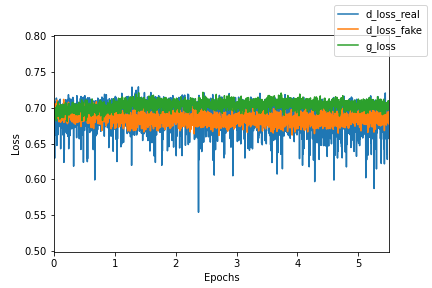

In [ ]:
%matplotlib notebook
# train model
n_runs = 64
total_batch = 0
total_epochs = 0
n_batch = 128
n_epochs = 16

print('train model for ' + str(n_runs * n_epochs))
for k in range(n_runs):
    print(k)
    total_batch = total_batch + (dataset[0].shape[0] / n_batch) * n_epochs
    print(total_batch)
    train_cgan(generator_model, discriminator_model, GAN, dataset, latent_dim)
    pp = create_process_vector(YS[0])
    latent_points, labels, _ = generate_latent_points(latent_dim, 1)
    del labels
    X_test = generator_model.predict([latent_points, pp])
    X_test = scaler_x.inverse_transform(X_test.reshape(1,-1))
    visualize(X_test[0])
    

    # save models
    savename = '7x7_aug_data'
    generator_model.save(savename+'_total_batches_'+str(total_batch) + '_generator.h5')
    discriminator_model.save(savename+'_total_batches_'+str(total_batch) + ' _discriminator.h5')
    GAN.save(savename+'_total_batches_'+str(total_batch) + '_gan.h5')

In [52]:
generator_model.load_weights('conv_paper_2_total_batches_62.5_generator.h5')

In [39]:
def create_process_vector(features):
    features = np.array(features).reshape(1, -1)
    process_vector = scaler_y_2.transform(features)
    return process_vector

In [40]:
import plotly.figure_factory as ff
from scipy.spatial import Delaunay

def visualize(thickness):
    site = pd.read_csv('site_coordinates.csv')
    site['SITE_Z'] = thickness
    points2D = np.vstack([site['SITE_X'], site['SITE_Y']]).T
    tri = Delaunay(points2D)
    simplices = tri.simplices

    fig = ff.create_trisurf(site['SITE_X'], site['SITE_Y'], site['SITE_Z'],
                             simplices=simplices,
                             title="wafare", aspectratio=dict(x=1, y=1, z=0.5))
    fig.show()


In [51]:
latent_points, labels, _ = generate_latent_points(latent_dim, 1)

In [52]:
# latent_points, labels, _ = generate_latent_points(latent_dim, 1)
i = 0
pp = create_process_vector(YS[i])
print(pp)
X_test = generator_model.predict([latent_points, pp])

X_test = X_test.reshape(49,)
X_test = scaler_x.inverse_transform(X_test.reshape(1,-1))
visualize(X_test[0])
visualize(df[all_sites].iloc[i].values)

[[0.39021095 0.45628732 0.48135068 1.         0.         0.
  0.        ]]
